# Example for DimensionalityReduction

モデルは別ファイルに定義されている．

In [1]:
using LinearAlgebra
using PyPlot, PyCall
using ArgParse
using Distributions

push!(LOAD_PATH, ".")
using DimensionalityReduction

┌ Info: Recompiling stale cache file /Users/ryosuke/.julia/compiled/v1.1/DimensionalityReduction.ji for DimensionalityReduction [top-level]
└ @ Base loading.jl:1184


In [3]:
function inference_face_missing()
    # Load data
    datasets = pyimport("sklearn.datasets")
    dataset = datasets.fetch_olivetti_faces(shuffle=true)
    Y = deepcopy(dataset["data"])
    N, D = size(Y)

    # Mask
    missing_rate = 0.50
    mask = rand(Uniform(), size(Y)) .< missing_rate
    Y_obs = deepcopy(Y)
    Y_obs[mask] .= NaN
    Y_obs = convert(Array{Float64, 2}, Y_obs)

    # Hyper-parameters
    M = 16
    sigma2_y = 0.001
    m_w = zeros(M, D)
    Sigma_w = zeros(M, M, D)
    for d in 1:D
        Sigma_w[:, :, d] = 0.1 * Matrix{Float64}(I, M, M)
    end
    m_mu = zeros(D)
    Sigma_mu = Matrix{Float64}(I, D, D)
    
    # Prior
    prior = DimensionalityReduction.DRModel(D, M, sigma2_y, m_w, Sigma_w,
                                            m_mu, Sigma_mu)

    # Inference
    max_iter = 100
    posterior, Z_est = DimensionalityReduction.VI(deepcopy(Y_obs), prior,
                                                  max_iter)
    
    return dataset, Y_obs, posterior, Z_est
end

inference_face_missing (generic function with 1 method)

In [22]:
function plot_missings(dataset, Y_obs, posterior, Z_est)
    Y_est = Z_est * posterior.m_W + repeat(posterior.m_mu', size(Z_est, 1), 1)
    mask = isnan.(Y_obs)
    Y_itp = deepcopy(Y_obs)
    Y_itp[mask] = Y_est[mask]

    # Visualize
    figure("Olivetti faces")
    clf()
    for i in 1:12
        subplot(6, 6, i)
        imshow(dataset["images"][i, :, :])
        xticks([])
        yticks([])
    end
    
    for i in 1:12
        subplot(6, 6, i + 12)
        imshow(reshape(Y_obs[i, :], 64, 64)')
        xticks([])
        yticks([])
    end

    for i in 1:12
        subplot(6, 6, i + 24)
        imshow(reshape(Y_itp[i, :], 64, 64)')
        xticks([])
        yticks([])
    end
    
    show()
end

plot_missings (generic function with 2 methods)

In [5]:
dataset, Y_obs, posterior, Z_est = inference_face_missing()

(Dict{Any,Any}("images"=>Float32[0.669421 0.661157 … 0.157025 0.140496; 0.768595 0.801653 … 0.409091 0.458678; … ; 0.520661 0.508264 … 0.363636 0.334711; 0.396694 0.38843 … 0.384298 0.371901]

Float32[0.636364 0.623967 … 0.157025 0.152893; 0.756198 0.789256 … 0.524793 0.528926; … ; 0.520661 0.512397 … 0.392562 0.396694; 0.367769 0.35124 … 0.367769 0.400826]

Float32[0.64876 0.665289 … 0.152893 0.181818; 0.743802 0.789256 … 0.471074 0.458678; … ; 0.533058 0.516529 … 0.359504 0.367769; 0.342975 0.252066 … 0.392562 0.38843]

...

Float32[0.140496 0.173554 … 0.0867769 0.0867769; 0.615702 0.619835 … 0.570248 0.483471; … ; 0.603306 0.590909 … 0.466942 0.466942; 0.417355 0.42562 … 0.355372 0.371901]

Float32[0.260331 0.157025 … 0.0867769 0.0826446; 0.677686 0.677686 … 0.607438 0.628099; … ; 0.590909 0.566116 … 0.433884 0.438017; 0.322314 0.338843 … 0.256198 0.268595]

Float32[0.301653 0.297521 … 0.0661157 0.0743802; 0.578512 0.603306 … 0.694215 0.652893; … ; 0.53719 0.53719 … 0.433884 0.43801

## 上から，実際の画像，観測値，補間値

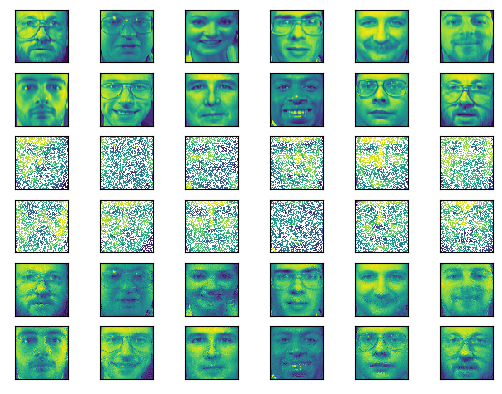

In [23]:
plot_missings(dataset, Y_obs, posterior, Z_est)